<a href="https://colab.research.google.com/github/kognavi/california-housing-linear-regression-/blob/main/california_housing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=134cd3d6f2bf03f5c64c36372ed7ead7abc38bb14237f162bf186cd05d86a9f4
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib
--- データの最初の5行 ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585

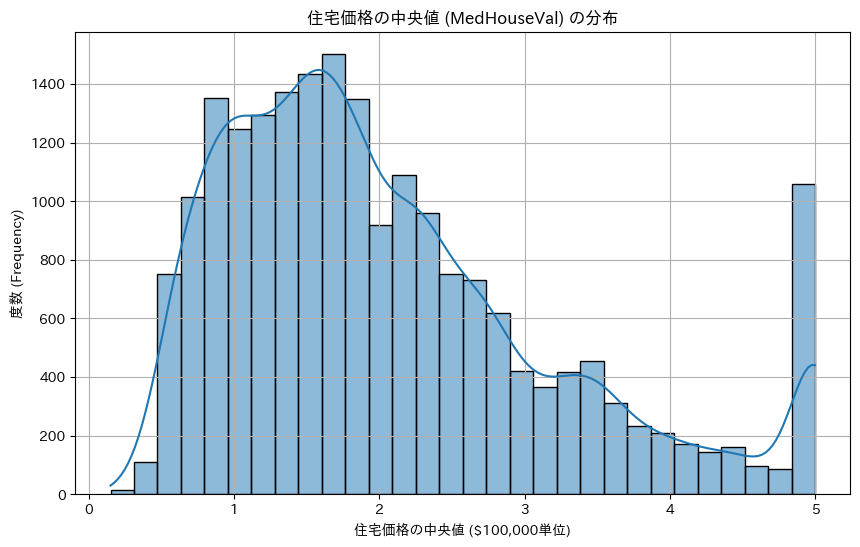


--- 特徴量間の相関行列ヒートマップ ---


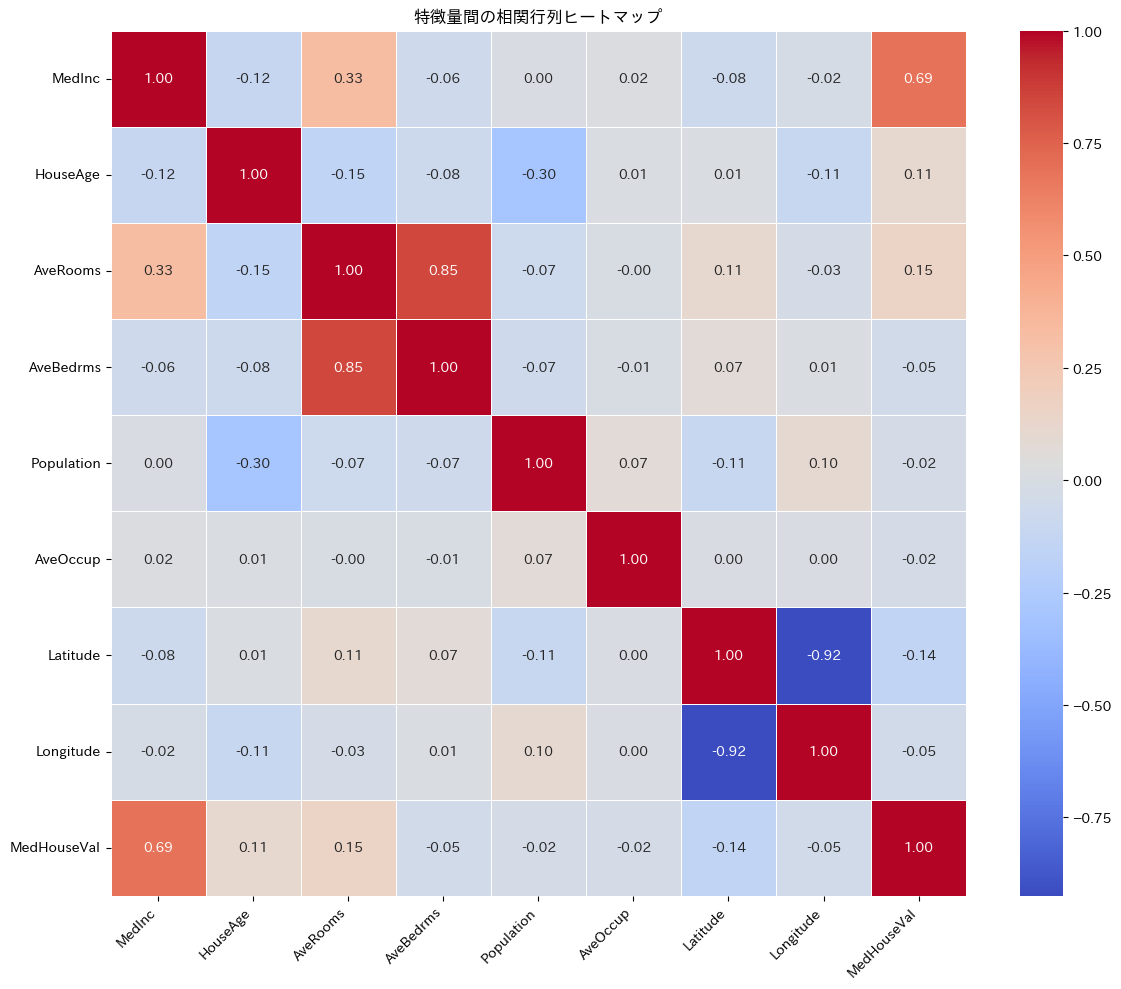


--- 収入の中央値 (MedInc) と住宅価格の中央値 (MedHouseVal) の散布図 ---


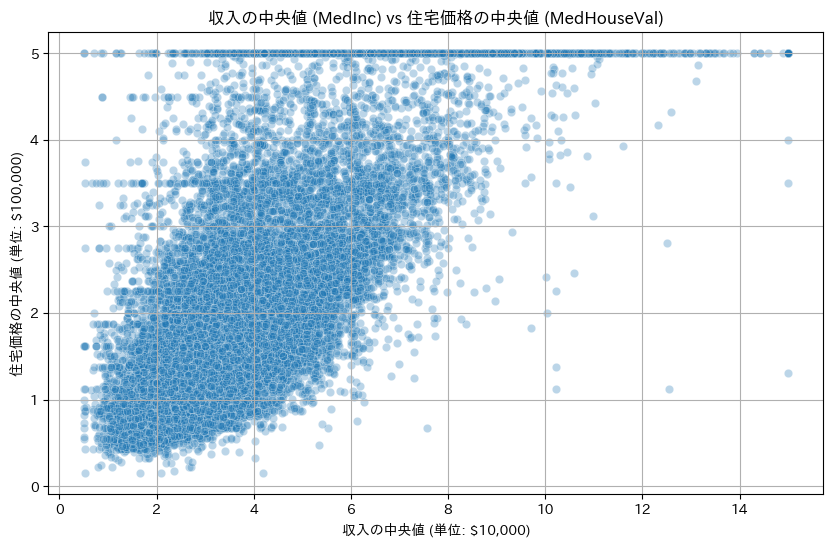


--- 平均部屋数 (AveRooms) と住宅価格の中央値 (MedHouseVal) の散布図 ---


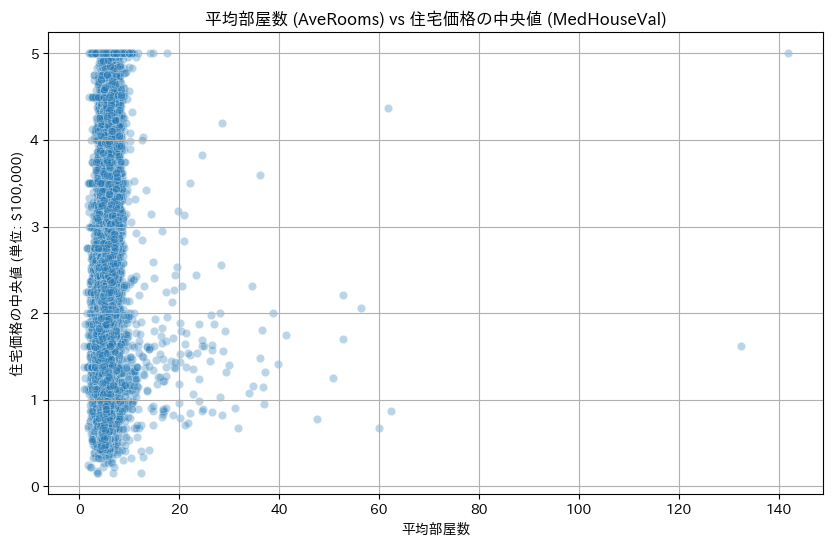

訓練データのサンプル数: 16512
テストデータのサンプル数: 4128
モデルの訓練が完了しました。
決定係数 (R²): 0.5758
平均二乗誤差 (MSE): 0.5559
平均絶対誤差 (MAE): 0.5332


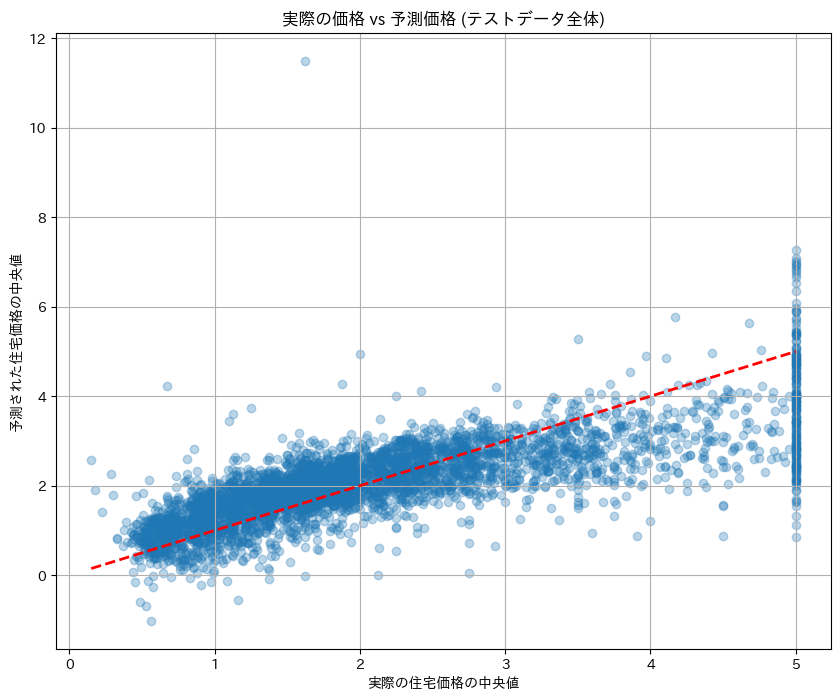

In [2]:
# セル 1: Markdown
# # カリフォルニア住宅価格予測：線形回帰モデル
#
# ## 概要
# このNotebookでは、scikit-learnのカリフォルニア住宅データセットを用いて、線形回帰モデルによる住宅価格の中央値予測を行います。
#
# ## 分析フロー
# 1. ライブラリのインポート
# 2. データの読み込みと確認
# 3. データ可視化 (EDA)
# 4. データの前処理 (訓練・テスト分割)
# 5. 線形回帰モデルの訓練
# 6. 予測と評価
# 7. 結果の可視化

# セル 2: Code (ライブラリインポート)
# coding: utf-8
!pip install japanize_matplotlib
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib # 日本語化ライブラリ

# セル 3: Markdown
# ## 2. データの読み込みと確認
# `fetch_california_housing` を使ってデータを読み込み、基本的な情報を確認します。

# セル 4: Code (データ読み込み・確認)
california = fetch_california_housing(as_frame=True)
df = california.frame
print("--- データの最初の5行 ---")
print(df.head())
print("\n--- データフレームの基本情報 ---")
df.info()
print("\n--- 各列の要約統計量 ---")
print(df.describe())
print("\n--- 欠損値の確認 ---")
print(df.isnull().sum())

# セル 5: Markdown
# ## 3. データ可視化 (EDA)
# ターゲット変数 (MedHouseVal) の分布や、特徴量間の相関、価格と関連の強そうな特徴量との関係を可視化して確認します。

# セル 6: Code (ターゲット変数の分布 - 既存コードから移動)
print("\n--- 住宅価格の中央値 (MedHouseVal) の分布 ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('住宅価格の中央値 (MedHouseVal) の分布')
plt.xlabel('住宅価格の中央値 ($100,000単位)')
plt.ylabel('度数 (Frequency)')
plt.grid(True)
plt.show()

# セル 7: Code (相関行列ヒートマップ - 既存コードから移動)
print("\n--- 特徴量間の相関行列ヒートマップ ---")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('特徴量間の相関行列ヒートマップ')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# セル 8: Code (散布図 MedInc vs MedHouseVal - 既存コードから移動)
print("\n--- 収入の中央値 (MedInc) と住宅価格の中央値 (MedHouseVal) の散布図 ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.3)
plt.title('収入の中央値 (MedInc) vs 住宅価格の中央値 (MedHouseVal)')
plt.xlabel('収入の中央値 (単位: $10,000)')
plt.ylabel('住宅価格の中央値 (単位: $100,000)')
plt.grid(True)
plt.show()

# セル 9: Code (散布図 AveRooms vs MedHouseVal - 既存コードから移動)
print("\n--- 平均部屋数 (AveRooms) と住宅価格の中央値 (MedHouseVal) の散布図 ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.3)
plt.title('平均部屋数 (AveRooms) vs 住宅価格の中央値 (MedHouseVal)')
plt.xlabel('平均部屋数')
plt.ylabel('住宅価格の中央値 (単位: $100,000)')
# plt.xlim(0, 20) # 必要に応じて調整
plt.grid(True)
plt.show()

# セル 10: Markdown
# ## 4. データの前処理 (訓練・テスト分割)
# モデルの訓練に使用するデータと、モデルの性能評価に使用するデータに分割します。

# セル 11: Code (データ分割 - 既存コードから移動)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"訓練データのサンプル数: {X_train.shape[0]}")
print(f"テストデータのサンプル数: {X_test.shape[0]}")

# セル 12: Markdown
# ## 5. 線形回帰モデルの訓練
# 最も基本的な回帰モデルである線形回帰モデルを選択し、訓練データで学習させます。
# これは、他の複雑なモデルと比較するためのベースラインとなります。

# セル 13: Code (モデル訓練 - 既存コードから移動)
model = LinearRegression()
model.fit(X_train, y_train)
print("モデルの訓練が完了しました。")

# セル 14: Markdown
# ## 6. 予測と評価
# 訓練済みモデルを使ってテストデータの住宅価格を予測し、性能を評価します。
# - **決定係数 (R²)**: モデルがデータのばらつきをどれだけ説明できているか (1に近いほど良い)。
# - **平均二乗誤差 (MSE)**: 予測誤差の二乗の平均 (0に近いほど良い)。
# - **平均絶対誤差 (MAE)**: 予測誤差の絶対値の平均 (0に近いほど良い、誤差の大きさを直感的につかみやすい)。

# セル 15: Code (予測と評価 - 既存コードから移動)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"決定係数 (R²): {r2:.4f}")
print(f"平均二乗誤差 (MSE): {mse:.4f}")
print(f"平均絶対誤差 (MAE): {mae:.4f}")

# セル 16: Markdown
# ## 7. 結果の可視化
# テストデータにおける実際の価格とモデルによる予測価格を散布図で比較します。
# 赤い破線は y=x の直線であり、点がこの線に近いほど予測が正確であることを示します。

# セル 17: Code (結果の可視化 - 既存コードから移動、全件表示に変更)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.3) # 全てのテストデータをプロット
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("実際の住宅価格の中央値")
plt.ylabel("予測された住宅価格の中央値")
plt.title("実際の価格 vs 予測価格 (テストデータ全体)")
plt.grid(True)
plt.show()

# セル 18: Markdown
# ## 8. 考察
# 決定係数 R² は約 0.58 となり、線形回帰モデルでは住宅価格の変動の約58%しか説明できていないことがわかります。
# MAEは約0.53であり、平均して約$53,000程度の予測誤差があることを示唆しています。
# 散布図からも、特に価格が高い領域で予測が実際の値から乖離する傾向が見られます。
#
# より精度を向上させるためには、特徴量エンジニアリングや、非線形な関係を捉えられる他のモデル（ランダムフォレスト、勾配ブースティングなど）を試すことが考えられます。

# セル 19: Code (オプション: モデル係数の表示 - 既存コードから移動・修正)
# print("\n--- (参考) 学習したモデルの係数 ---")
# coefficients = pd.DataFrame(model.coef_, X.columns, columns=['係数'])
# print(coefficients)
# print(f"\n切片 (Intercept): {model.intercept_:.4f}")
